In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data0 = pd.read_csv('finalData.csv',index_col=0)
data = data0.drop(['NOC','Year'],axis=1)
data0

,NOC,Year,Medal,Event_Count,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7,Cluster8,Cluster9,Male_Percentage,is_Host?
0,AFG,1936,0,4,0,0,0,0,0,0,0,0,0,100.000000,0.0
1,AFG,1948,0,2,0,0,0,0,0,0,0,0,0,100.000000,0.0
2,AFG,1956,0,1,0,0,0,0,0,0,0,0,0,100.000000,0.0
3,AFG,1960,0,13,0,0,0,0,0,0,0,0,0,100.000000,0.0
4,AFG,1964,0,8,0,0,0,0,0,0,0,0,0,100.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,ZIM,2008,9,15,0,0,0,0,0,9,0,0,0,50.000000,0.0
3255,ZIM,2012,0,8,0,0,0,0,0,0,0,0,0,44.444444,0.0
3256,ZIM,2016,0,13,0,0,0,0,0,0,0,0,0,29.032258,0.0
3257,ZIM,2020,0,5,0,0,0,0,0,0,0,0,0,80.000000,0.0


In [4]:
from sklearn.preprocessing import StandardScaler
import numpy as np
newData = data.loc[:, data.columns].values
newData = StandardScaler().fit_transform(newData) # normalizing the features
newData = np.nan_to_num(newData,nan=0)
newData

array([[-0.36087219, -0.64892695, -0.06667666, ..., -0.31258529,
         1.15793467, -0.10114043],
       [-0.36087219, -0.68947789, -0.06667666, ..., -0.31258529,
         1.15793467, -0.10114043],
       [-0.36087219, -0.70975335, -0.06667666, ..., -0.31258529,
         1.15793467, -0.10114043],
       ...,
       [-0.36087219, -0.46644774, -0.06667666, ..., -0.31258529,
        -0.75819802, -0.10114043],
       [-0.36087219, -0.62865148, -0.06667666, ..., -0.31258529,
         0.61793364, -0.10114043],
       [-0.36087219, -0.60837601, -0.06667666, ..., -0.31258529,
         0.38650463, -0.10114043]], shape=(3259, 13))

In [5]:
normalized = pd.DataFrame(newData,columns=data.columns)
normalized

,Medal,Event_Count,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7,Cluster8,Cluster9,Male_Percentage,is_Host?
0,-0.360872,-0.648927,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,-0.348860,-0.119152,-0.047424,-0.312585,1.157935,-0.10114
1,-0.360872,-0.689478,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,-0.348860,-0.119152,-0.047424,-0.312585,1.157935,-0.10114
2,-0.360872,-0.709753,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,-0.348860,-0.119152,-0.047424,-0.312585,1.157935,-0.10114
3,-0.360872,-0.466448,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,-0.348860,-0.119152,-0.047424,-0.312585,1.157935,-0.10114
4,-0.360872,-0.567825,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,-0.348860,-0.119152,-0.047424,-0.312585,1.157935,-0.10114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,-0.081761,-0.425897,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,0.010778,-0.119152,-0.047424,-0.312585,-0.192068,-0.10114
3255,-0.360872,-0.567825,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,-0.348860,-0.119152,-0.047424,-0.312585,-0.342068,-0.10114
3256,-0.360872,-0.466448,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,-0.348860,-0.119152,-0.047424,-0.312585,-0.758198,-0.10114
3257,-0.360872,-0.628651,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,-0.348860,-0.119152,-0.047424,-0.312585,0.617934,-0.10114


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pc_lst = pca.fit_transform(normalized)
pc_df = pd.DataFrame(pc_lst, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pc_df

,PC1,PC2,PC3,PC4
0,-0.823923,0.285137,0.290986,0.855071
1,-0.839083,0.287305,0.292418,0.846359
2,-0.846663,0.288389,0.293134,0.842004
3,-0.755702,0.275380,0.284543,0.894270
4,-0.793603,0.280800,0.288122,0.872493
...,...,...,...,...
3254,-0.544001,-0.027059,-0.093571,-0.130423
3255,-0.867143,-0.097799,-0.063223,-0.343031
3256,-0.849645,-0.208250,-0.164273,-0.658464
3257,-0.842818,0.147757,0.163786,0.421837


In [7]:
pca_comps = pd.DataFrame(pca.components_, index=['PC1', 'PC2','PC3', 'PC4'])
pca_comps

,0,1,2,3,4,5,6,7,8,9,10,11,12
PC1,0.427348,0.373855,0.101820,0.300947,0.253430,0.234523,0.322738,0.398873,0.174956,0.074324,0.334416,0.049027,0.209311
PC2,0.054578,-0.053470,0.510527,-0.357503,-0.056551,-0.016044,-0.114043,0.070168,-0.439416,-0.342637,0.277401,0.252399,0.364950
PC3,-0.067512,-0.035311,0.352896,-0.000757,-0.249254,-0.160599,-0.238517,-0.115748,0.396046,0.652877,0.169888,0.234230,0.211247
PC4,0.062903,0.214818,-0.316225,0.040254,-0.055269,-0.278723,-0.070246,0.119593,-0.078530,-0.059958,0.016426,0.810348,-0.285664


In [8]:
pca_comps = pd.DataFrame(pca.components_, index= ['PC1', 'PC2','PC3','PC4'])
pca_comps

,0,1,2,3,4,5,6,7,8,9,10,11,12
PC1,0.427348,0.373855,0.101820,0.300947,0.253430,0.234523,0.322738,0.398873,0.174956,0.074324,0.334416,0.049027,0.209311
PC2,0.054578,-0.053470,0.510527,-0.357503,-0.056551,-0.016044,-0.114043,0.070168,-0.439416,-0.342637,0.277401,0.252399,0.364950
PC3,-0.067512,-0.035311,0.352896,-0.000757,-0.249254,-0.160599,-0.238517,-0.115748,0.396046,0.652877,0.169888,0.234230,0.211247
PC4,0.062903,0.214818,-0.316225,0.040254,-0.055269,-0.278723,-0.070246,0.119593,-0.078530,-0.059958,0.016426,0.810348,-0.285664


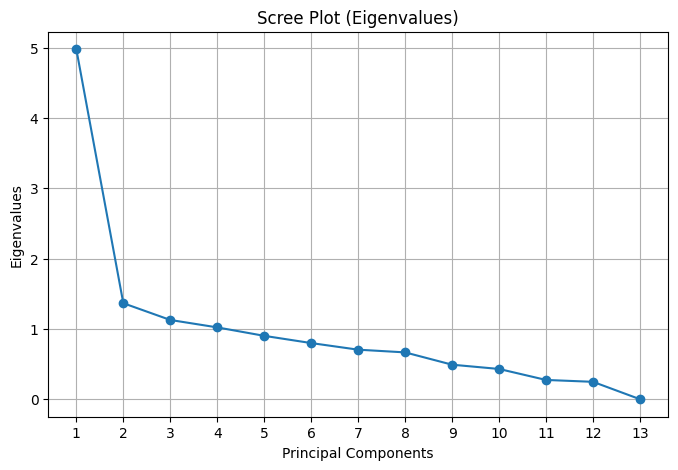

In [9]:
# Compute the covariance matrix
cov_matrix = np.cov(normalized, rowvar=False)

# Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Create a scree plot with eigenvalues
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o')
plt.title('Scree Plot (Eigenvalues)')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.xticks(range(1, len(sorted_eigenvalues) + 1))
plt.grid(True)
plt.show()

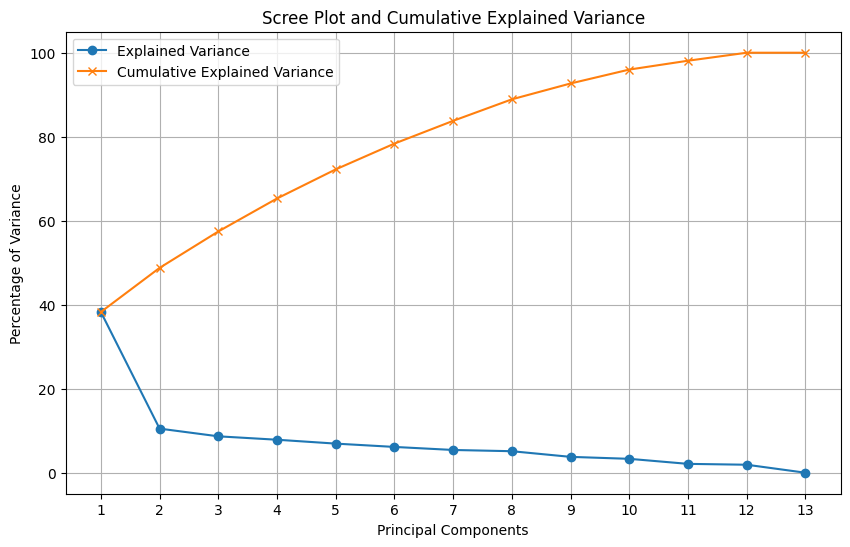

In [10]:
pca = PCA()
pca.fit(normalized)

# Explained variance ratio (percentage of variance)
explained_variance = pca.explained_variance_ratio_ * 100

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Create a combined plot with the scree plot and the cumulative explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='x', label='Cumulative Explained Variance')
plt.title('Scree Plot and Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.legend()
plt.show()

In [11]:
result = pd.DataFrame(index=normalized.index, columns=pca_comps.index)

# Calculate the linear combination for each principal component
for pc in pca_comps.index:
    result[pc] = np.sum(normalized * pca_comps.loc[pc].values, axis=1)

# Print the resulting DataFrame
result

,PC1,PC2,PC3,PC4
0,-0.823923,0.285137,0.290986,0.855071
1,-0.839083,0.287305,0.292418,0.846359
2,-0.846663,0.288389,0.293134,0.842004
3,-0.755702,0.275380,0.284543,0.894270
4,-0.793603,0.280800,0.288122,0.872493
...,...,...,...,...
3254,-0.544001,-0.027059,-0.093571,-0.130423
3255,-0.867143,-0.097799,-0.063223,-0.343031
3256,-0.849645,-0.208250,-0.164273,-0.658464
3257,-0.842818,0.147757,0.163786,0.421837


In [12]:
file_path = 'summerOly_athletes.csv'
data = pd.read_csv(file_path)

# Display the first few rows and column information
data

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,Isayah Boers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,Kevin Staut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [13]:
# Ensure the Medal column is treated as a string before replacing characters
buffer = data.copy()
buffer['NOC'] = buffer['NOC'].str.replace('\xa0', '', regex=True)
buffer["Medal"] = buffer["Medal"].str.replace('\xa0', '', regex=True)
buffer['Sport'] = buffer['Sport'].str.split(',', n=1).str[0]

# Weight gold, silver, and bronze medals equally as per the mapping
medal_mapping = {
    "No medal": 0,
    "Bronze": 1,
    "Silver": 1,
    "Gold": 1
}
buffer["Medal"] = buffer["Medal"].replace(medal_mapping)

# Collapse the data to retain the maximum medal count for each NOC, Year, Sport, and Event
collapsed_data = buffer.groupby(['NOC', 'Year', 'Sport', 'Event'], as_index=False)["Medal"].max()

# Calculate total medals by NOC and Year
total_medals_by_noc = collapsed_data.groupby(['NOC', 'Year'], as_index=False)["Medal"].sum()

# Display the resulting DataFrame
total_medals_by_noc.head()

/tmp/ipykernel_100005/1967837106.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  buffer["Medal"] = buffer["Medal"].replace(medal_mapping)


,NOC,Year,Medal
0,AFG,1936,0
1,AFG,1948,0
2,AFG,1956,0
3,AFG,1960,0
4,AFG,1964,0


In [ ]:
newData = pd.merge(data0, result, left_index=True, right_index=True)
newData = newData.drop(['Medal','Event_Count','Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','Cluster6','Cluster7','Cluster8', 'Cluster9','Male_Percentage','is_Host?'],axis=1)
newData = newData.merge(total_medals_by_noc, on=['NOC','Year'], how = 'left').fillna(0)
newData


,NOC,Year,PC1,PC2,PC3,PC4,Medal
0,AFG,1936,-0.823923,0.285137,0.290986,0.855071,0
1,AFG,1948,-0.839083,0.287305,0.292418,0.846359,0
2,AFG,1956,-0.846663,0.288389,0.293134,0.842004,0
3,AFG,1960,-0.755702,0.275380,0.284543,0.894270,0
4,AFG,1964,-0.793603,0.280800,0.288122,0.872493,0
...,...,...,...,...,...,...,...
3254,ZIM,2008,-0.544001,-0.027059,-0.093571,-0.130423,4
3255,ZIM,2012,-0.867143,-0.097799,-0.063223,-0.343031,0
3256,ZIM,2016,-0.849645,-0.208250,-0.164273,-0.658464,0
3257,ZIM,2020,-0.842818,0.147757,0.163786,0.421837,0


In [14]:
import pandas as pd
import numpy as np
from py4etrics import tobit

df = newData.copy()
df['intercept'] = 1 
# Prepare the data
x = df[['intercept', 'PC1', 'PC2', 'PC3', 'PC4']].values  # Independent variables as a NumPy array
y = df['Medal'].values  # Dependent variable as a NumPy array
x, y

ModuleNotFoundError: No module named 'py4etrics'

In [15]:
# Define censoring information (left censoring at 0)
cens = np.where(y == 0, -1, 0)  # 0 for censored, 1 for uncensored
cens

array([-1, -1, -1, ..., -1, -1, -1], shape=(3259,))

In [16]:
# Fit the Tobit model
tobit_model = tobit.Tobit(endog=y, exog=x, cens=cens)
xtol = 1e10
results = tobit_model.fit(maxiter=1e30)

# Print the results
results.summary()

Optimization terminated successfully.
         Current function value: 1.572364
         Iterations: 425
         Function evaluations: 662


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Tobit Regression Results                             
===================================================================================
Dep. Variable:                           y   Pseudo R-squ:                    0.355
Method:                 Maximum Likelihood   Log-Likelihood:                -5124.3
No. Observations:                     3259   LL-Null:                       -7944.1
No. Uncensored Obs:                   1491   LL-Ratio:                       5639.5
No. Left-censored Obs:                1768   LLR p-value:                     0.000
No. Right-censored Obs:                  0   AIC:                           10258.7
Df Residuals:                         3254   BIC:                           10289.1
Df Model:                                4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2942      0.143      9.081      0.000       1.015       1.574
x1             7.0293      0.045    155.882      0.000       6.941       7.118
x2             1.0581      0.081     13.079      0.000       0.900       1.217
x3            -0.3145      0.089     -3.550      0.000      -0.488      -0.141
x4             4.3495      0.140     31.017      0.000       4.075       4.624
Log(Sigma)     1.6383      0.018     90.717      0.000       1.603       1.674
==============================================================================
"""

In [17]:
tobit_params = pd.Series(index=['intercept', 'PC1', 'PC2', 'PC3', 'PC4'], data=results.params[:-1])
tobit_params

intercept    1.294232
PC1          7.029321
PC2          1.058085
PC3         -0.314508
PC4          4.349485
dtype: float64

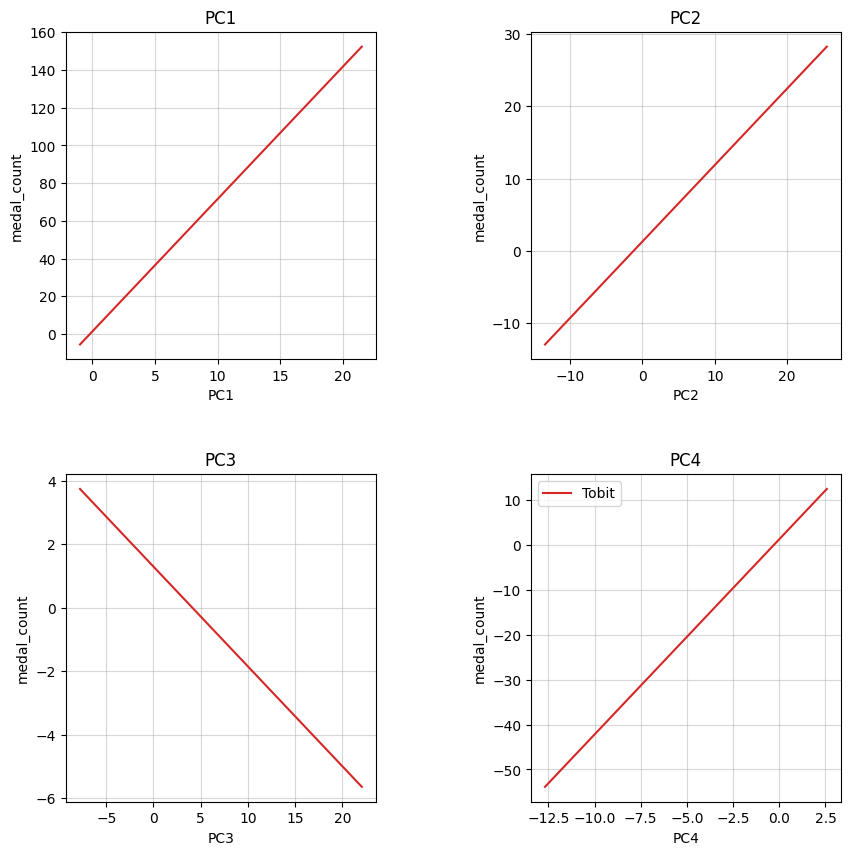

In [18]:
fig = plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.35, wspace=0.5)
for i, col in enumerate(tobit_params.keys()[1:]):
    ax = fig.add_subplot(2,2, i+1)
    
    x_min, x_max = df[col].min(), df[col].max()
    xa = np.linspace(x_min, x_max, 100)
    y_tobit = tobit_params['intercept'] + xa*tobit_params[col]
    
    ax.plot(xa, y_tobit, color='tab:red', label='Tobit')
    ax.grid(alpha=0.5)
    ax.set_axisbelow(True)
    
    ax.set_xlabel(col)
    ax.set_ylabel('medal_count')
    
    ax.set_title(col)
plt.legend()

In [19]:
print(y)
print(x)
print(tobit_params)

[0 0 0 ... 0 0 0]
[[ 1.         -0.82392311  0.28513698  0.2909863   0.85507057]
 [ 1.         -0.83908327  0.28730523  0.29241821  0.84635949]
 [ 1.         -0.84666335  0.28838935  0.29313416  0.84200395]
 ...
 [ 1.         -0.84964451 -0.20824982 -0.16427291 -0.65846356]
 [ 1.         -0.84281763  0.14775722  0.16378594  0.42183744]
 [ 1.         -0.8465838   0.08826068  0.10886239  0.23865498]]
intercept    1.294232
PC1          7.029321
PC2          1.058085
PC3         -0.314508
PC4          4.349485
dtype: float64


In [20]:
modeled_medals = np.dot(x, tobit_params)
np.set_printoptions(threshold=np.inf)
for row_a, row_b in zip(modeled_medals, y):
    print(round(row_a), row_b)

-1 0
-1 0
-1 0
0 0
0 0
0 0
0 0
0 0
0 0
-1 0
-5 0
-3 1
-2 1
-4 0
-3 0
-7 0
-1 0
-1 0
-1 0
-5 0
-1 0
-1 0
-6 0
-2 1
-3 0
0 0
-2 0
-1 0
-1 0
-6 5
-3 0
-3 0
-8 0
-7 0
-3 0
-5 0
-4 0
-6 0
-5 0
-5 2
0 0
0 0
0 0
1 0
1 2
0 0
1 2
2 3
2 5
1 0
-1 2
-3 1
2 2
-1 0
2 3
-12 0
-12 0
-12 0
-12 0
-11 0
-11 0
-11 0
-11 0
-11 0
-11 0
-12 0
-12 0
-12 0
-11 0
-10 0
-10 0
-11 0
-11 0
-11 0
-11 0
-11 0
-11 0
-11 0
-11 0
-11 0
-11 0
-10 0
-11 0
-11 0
-12 0
-11 0
-11 0
-12 0
-11 0
-11 0
-11 0
1 5
3 6
-1 0
-1 0
-1 0
3 6
7 7
4 4
3 7
10 7
6 5
2 2
4 2
5 1
3 2
3 1
1 0
3 0
3 2
2 1
6 3
7 4
10 6
7 6
5 4
8 4
4 3
4 3
2 2
0 1
-1 0
1 6
1 3
0 4
1 4
3 4
-11 0
-12 0
-12 0
-11 0
-12 0
-12 0
-12 0
-11 0
-12 0
-11 0
-11 0
-12 0
-11 0
-12 0
-12 0
-12 0
-12 0
-12 0
-11 0
-12 0
2 3
2 6
1 4
-10 3
1 3
6 5
1 4
2 5
0 1
6 13
12 10
29 26
18 19
15 16
13 15
19 17
9 5
6 9
17 24
18 14
27 26
39 39
71 55
60 46
45 44
37 35
27 29
46 44
53 49
4 5
3 6
2 4
-3 9
0 1
4 4
2 4
5 4
1 5
18 16
7 6
2 2
1 2
3 2
0 0
2 4
3 3
2 1
5 4
2 3
3 1
2 2
1 3
4 3
6 7
0 

In [21]:

df["predicted_medals"] = modeled_medals
sorted_df = df.sort_values(by=['Year', 'NOC'], ascending=[True, False])
asd = sorted_df.groupby('NOC').apply(lambda group: group.nlargest(3, 'Year')).reset_index(drop=True)
average_predicted_medals = asd.groupby('NOC')['predicted_medals'].mean().reset_index()
positive = average_predicted_medals[(average_predicted_medals['predicted_medals'] >= -1) &(average_predicted_medals['predicted_medals']<= 0)]
average_predicted_medals_sorted = positive.sort_values(by='predicted_medals', ascending=True)
average_predicted_medals_sorted

/tmp/ipykernel_2687/1303764275.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  asd = sorted_df.groupby('NOC').apply(lambda group: group.nlargest(3, 'Year')).reset_index(drop=True)


,NOC,predicted_medals
128,MAR,-0.959565
1,AHO,-0.953830
196,SVK,-0.931249
59,DOM,-0.604080
104,JAM,-0.579381


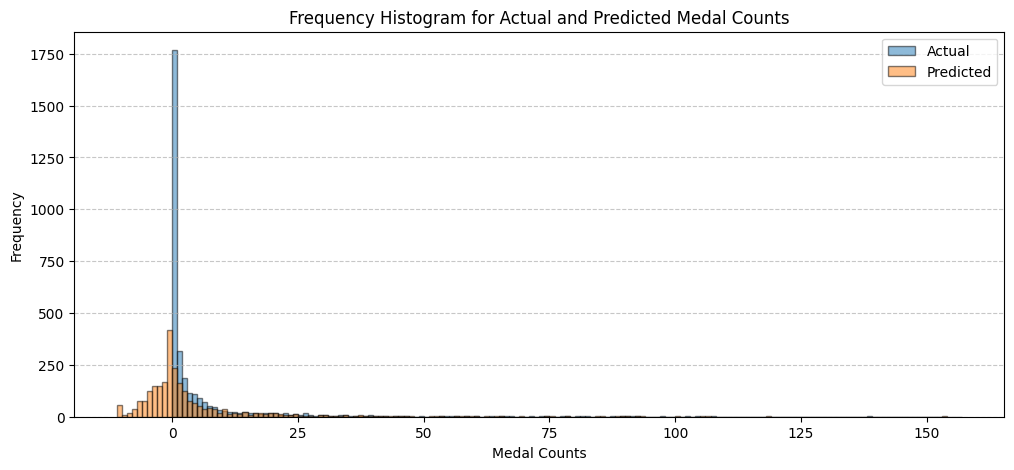

In [22]:
plt.figure(figsize=(12, 5))

plt.hist(y, bins=range(min(y), max(y) + 2), alpha=0.5, label='Actual', edgecolor='black')

# Histogram for row_b
plt.hist(modeled_medals, bins=range(int(min(modeled_medals)), int(max(modeled_medals)) + 2), alpha=0.5, label='Predicted', edgecolor='black')

# Add labels and legend
plt.title('Frequency Histogram for Actual and Predicted Medal Counts')
plt.xlabel('Medal Counts')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [2]:
type(modeled_medals)

NameError: name 'modeled_medals' is not defined

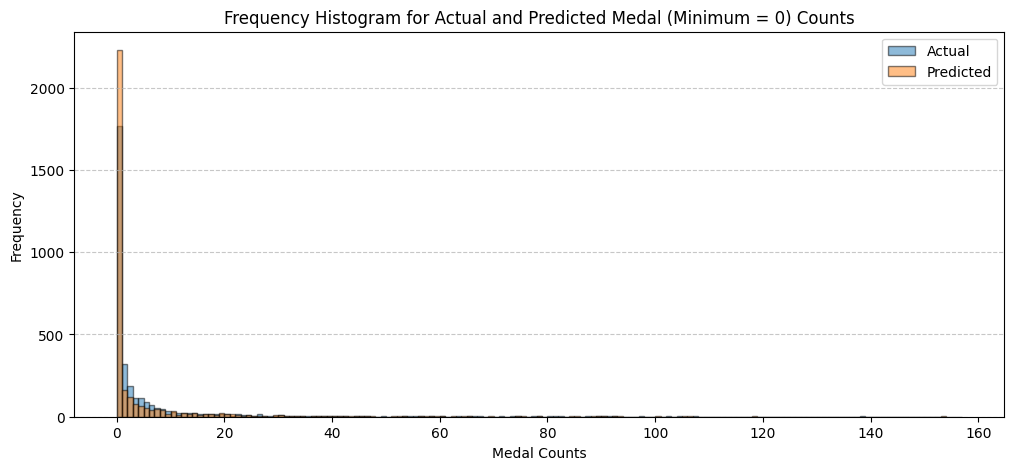

In [23]:
modeled_medals_c = modeled_medals.copy()
modeled_medals_c[modeled_medals < 0] = 0

plt.figure(figsize=(12, 5))

plt.hist(y, bins=range(min(y), max(y) + 2), alpha=0.5, label='Actual', edgecolor='black')

# Histogram for row_b
plt.hist(modeled_medals_c, bins=range(int(min(modeled_medals_c)), int(max(modeled_medals_c)) + 2), alpha=0.5, label='Predicted', edgecolor='black')

# Add labels and legend
plt.title('Frequency Histogram for Actual and Predicted Medal (Minimum = 0) Counts')
plt.xlabel('Medal Counts')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()